In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMG_SIZE=224
BATCH_SIZE=32

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/alzheimer/train',
target_size=(IMG_SIZE,IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='training'
)

Found 3200 images belonging to 4 classes.


In [ ]:
val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/alzheimer/train',
target_size=(IMG_SIZE,IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='validation'
)

Found 800 images belonging to 4 classes.


In [ ]:
class_indices=train_generator.class_indices
class_names=list(class_indices.keys())
print("class indices",class_indices)
print("class name:",class_names)

class indices {'mild demented': 0, 'moderate demented': 1, 'non demented': 2, 'very mild demented': 3}
class name: ['mild demented', 'moderate demented', 'non demented', 'very mild demented']


In [ ]:
model=keras.Sequential([
layers.Conv2D(32, (3,3), activation='relu',
input_shape=(IMG_SIZE,IMG_SIZE,3)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Conv2D(128, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(128, activation='relu'),

layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics
=['accuracy'])

In [ ]:
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 852s 8s/step - accuracy: 0.3368 - loss: 1.4077 - val_accuracy: 0.5650 - val_loss: 0.9530
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - accuracy: 0.6375 - loss: 0.8707 - val_accuracy: 0.6150 - val_loss: 0.8563
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - accuracy: 0.7596 - loss: 0.5971 - val_accuracy: 0.6600 - val_loss: 0.8209
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 174ms/step - accuracy: 0.8319 - loss: 0.3983 - val_accuracy: 0.6612 - val_loss: 0.8722
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 177ms/step - accuracy: 0.9220 - loss: 0.2215 - val_accuracy: 0.6925 - val_loss: 0.9704


In [ ]:
model.save('/content/drive/MyDrive/alzheimer/alzheimer.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/alzheimer/alzheimer.h5')
print("Model Loaded")

Model Loaded


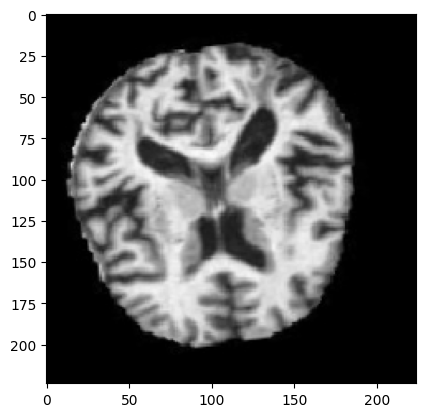

In [ ]:

test_image_path="/content/drive/MyDrive/alzheimer/train/mild demented/000cdcc4-3e54-4034-a538-203c8047b564.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [ ]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255.0

In [ ]:
prediction=model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_names[ind])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step
very mild demented
